In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
# from tensorflow.keras.applications import ResNet50



# Setuping Data

In [ ]:
import zipfile

extracted_file = "/content/indian_food_images"

with zipfile.ZipFile("/content/drive/MyDrive/ai-project-dataset/Indian Food Images.zip", 'r') as zip_ref:
  zip_ref.extractall(extracted_file)

# /content/drive/MyDrive/ai-project-dataset

In [ ]:
import pathlib

data_dir = pathlib.Path("/content/indian_food_images/Indian Food Images")
data_dir

PosixPath('/content/indian_food_images/Indian Food Images')

50
[PosixPath('/content/indian_food_images/Indian Food Images/bhatura/9bdae15cf5.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/6b7d6a02b0.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/8b37f8729e.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/10e2670c3b.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/3f2be0dce2.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/9ff0e71a7b.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/5e5fcfafab.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/8a31202469.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/6ca43de67f.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/7f4e67b3a2.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/2b9a862167.jpg'), PosixPath('/content/indian_food_images/Indian Food Images/bhatura/7dfec3

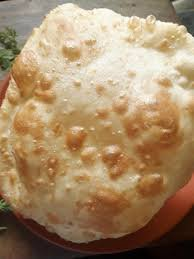

In [ ]:
food_images = list(data_dir.glob('bhatura/*'))
print(len(food_images))
print(food_images)
PIL.Image.open(str(food_images[0]))



In [ ]:
img_height,img_width=180,180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,   #randomness
  image_size=(img_height, img_width),
  batch_size=batch_size)  #chunk of data passed into model at a time

Found 4427 files belonging to 87 classes.
Using 3542 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4427 files belonging to 87 classes.
Using 885 files for validation.


In [ ]:
class_names = len(train_ds.class_names)
cls_nm = train_ds.class_names
print(cls_nm)


['adhirasam', 'aloo matar', 'aloo shimla mirch', 'aloo tikki', 'anarsa', 'apple fruit', 'ariselu', 'banana fruit', 'bandar laddu', 'basundi', 'bhatura', 'bhindi masala', 'biryani', 'boiled egg', 'boiled rice', 'boondi raita', 'butter chicken', 'carrot', 'cauliflower', 'cham cham', 'chana masala', 'chapati', 'cheese pizza', 'chicken stew', 'chicken tikka', 'chicken tikka masala', 'chikki', 'daal baati churma', 'daal puri', 'dal makhani', 'dal tadka', 'dharwad pedha', 'doodhpak', 'double ka meetha', 'dum aloo', 'fish curry', 'gajar ka halwa', 'gavvalu', 'ghee rice', 'ghevar', 'gobi 65', 'gulab jamun with khoya', 'hot tea', 'idli', 'imarti', 'jalebi', 'kachori', 'kadhi pakoda', 'kajjikaya', 'kakinada khaja', 'kalakand', 'karela bharta', 'kofta', 'kuzhi paniyaram', 'lassi', 'litti chokha', 'makki ki roti', 'malapua', 'misti doi', 'modak', 'mysore pak', 'naan', 'navrattan korma', 'orange fruit', 'palak paneer', 'paneer butter masala', 'pea paneer curry', 'phirni', 'pithe', 'plain dosa', 'po

# Training Model

In [ ]:

input_tensor = tf.keras.Input(shape=(180, 180, 3))

base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,  # Must be tf.keras.Input
    pooling='avg'
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
output_tensor = tf.keras.layers.Dense(87, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

model.summary()

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),   #small value = slower, stable learning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#one full pass through the entire training dataset(1 epoch)
#validation_data =  Dataset used to evaluate performance after each epoch

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 573s 5s/step - accuracy: 0.1479 - loss: 4.0349 - val_accuracy: 0.3525 - val_loss: 2.5790
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 556s 5s/step - accuracy: 0.5381 - loss: 1.7626 - val_accuracy: 0.4316 - val_loss: 2.2191
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 527s 5s/step - accuracy: 0.7218 - loss: 1.0611 - val_accuracy: 0.4610 - val_loss: 2.1351
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 603s 5s/step - accuracy: 0.8296 - loss: 0.6809 - val_accuracy: 0.4768 - val_loss: 2.0970
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.9008 - loss: 0.4201 - val_accuracy: 0.5017 - val_loss: 2.1226
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 604s 5s/step - accuracy: 0.9374 - loss: 0.2896 - val_accuracy: 0.4994 - val_loss: 2.1443
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 559s 5s/step - accuracy: 0.9706 - loss: 0.1753 - val_accuracy: 0.5232 - val_loss: 2.0536
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 567s 5s/step - accuracy: 0.9834 - loss: 0.1197 - val_accu

In [ ]:
model.save('food_model.keras')